## AllLife Credit Card Customer Segmentation 

#### Background: 

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

#### Objective: 
To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

#### Key Questions: 
1.	How many different segments of customers are there? 
2.	How are these segments different from each other? 
3.	What are your recommendations to the bank on how to better market to and service these customers? 

#### Data Description: 
•   Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call center.


#### Load Key Libraries

In [1]:
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.stats import zscore    # import sklearn.metrics


#### Read and Load Dataset

In [2]:
# Load Dataset
Cust_Data = pd.read_excel('E:/PGP05_Projects/CreditCard_CustomerData.xlsx')  

### 1.    Perform univariate analysis on the data to better understand the variables at your disposal and to get an idea about the no of clusters. Perform EDA, create visualizations to explore data. (10 marks).

### Exploratory Data Analysis

#### Check Shape, Datatype and Null values

In [3]:
Cust_Data.shape

(660, 7)

In [4]:
Cust_Data.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [5]:
Cust_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
Sl_No                  660 non-null int64
Customer Key           660 non-null int64
Avg_Credit_Limit       660 non-null int64
Total_Credit_Cards     660 non-null int64
Total_visits_bank      660 non-null int64
Total_visits_online    660 non-null int64
Total_calls_made       660 non-null int64
dtypes: int64(7)
memory usage: 36.2 KB


In [6]:
Cust_Data.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

#### Observation: There are no missing values

In [7]:
Cust_Data.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


#### Observations: 
1. Credit Limit ranges from min=34,574 to max=200,000 with most customers (75%) below 48,000 so lower credit customers
2. There are more visits/queries online and through the phone than physical visists to the bank

In [8]:
Cust_Data.skew()

Sl_No                  0.000000
Customer Key           0.051462
Avg_Credit_Limit       2.202396
Total_Credit_Cards     0.144879
Total_visits_bank      0.141896
Total_visits_online    2.225607
Total_calls_made       0.658905
dtype: float64

#### Observation: 
Average Credit Limit and Online Visits are skewed,hence need to transform or bin the variables 

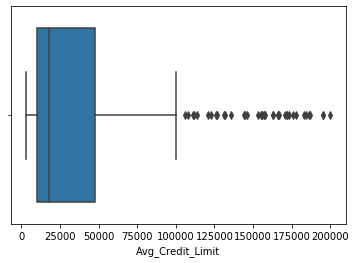

In [9]:
#Check for Outliers

sns.boxplot(Cust_Data['Avg_Credit_Limit'])
plt.show()

#### Observation:
Credit Limit beyond 100,000 is an outlier. Median Credit Limit amount is about 20,000

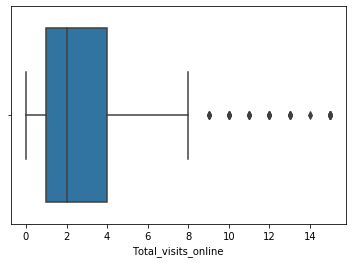

In [10]:
sns.boxplot(Cust_Data['Total_visits_online'])
plt.show()

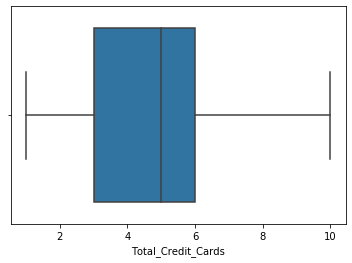

In [11]:
sns.boxplot(Cust_Data['Total_Credit_Cards'])
plt.show()

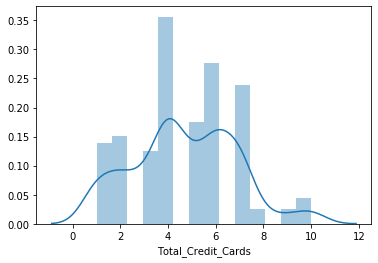

In [12]:
sns.distplot(Cust_Data['Total_Credit_Cards'])
plt.show()

#### Observation:
Average no. of cards is 5, with peaks at 4 & 6 and a max of 10. 

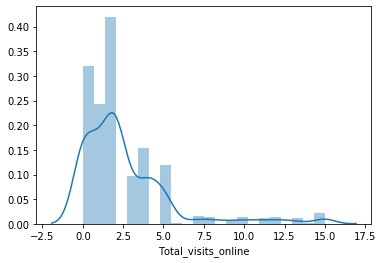

In [13]:
sns.distplot(Cust_Data['Total_visits_online'])
plt.show()

### 2.   Properly comment on the codes, provide explanations of the steps taken in the notebook and conclude your insights from the graphs. (5 marks).

#### Group and Check how many different Customer Segnents there are 

In [14]:
# Drop 'Sl_No' and 'Customer Key' variables as they are redundat and not necessary for clustering

Cust_Data_New = Cust_Data.drop(['Sl_No','Customer Key'], axis =1)
Cust_Data_New.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


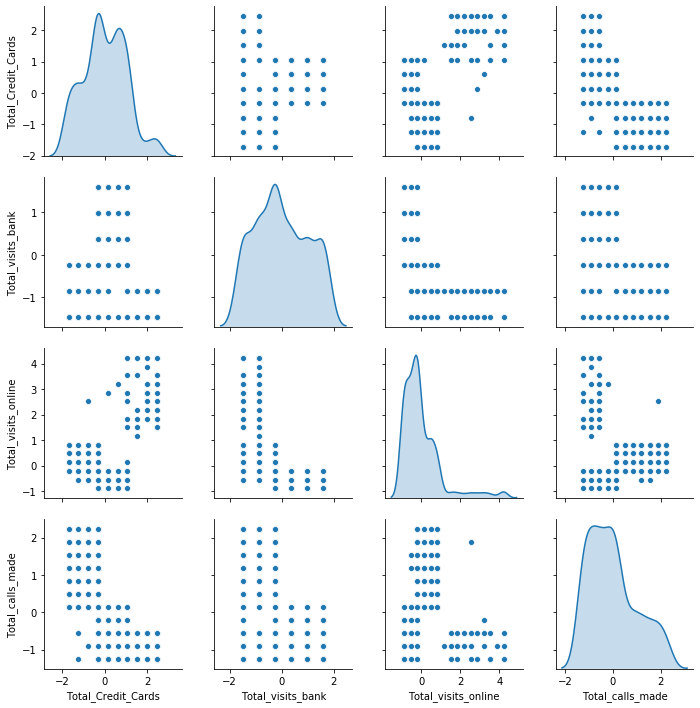

In [15]:
# Scale the Data to standardise it

Cust_Data_Types=Cust_Data_New.iloc[:,1:]
Cust_Data_Scaled=Cust_Data_Types.apply(zscore)
sns.pairplot(Cust_Data_Scaled, diag_kind='kde')

#### Observation:
Shows at least 3 clusters for 'Ave Credit Limit', 'Total Credit Cards', 'Total Visits Online' and 'Total Calls Made' 

### 3.	Execute K-means clustering use elbow plot and analyse clusters using boxplot (10 marks).

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

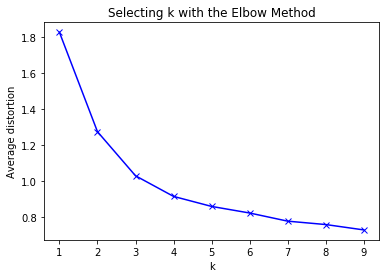

In [16]:
# Getting no. of optimal clusters through plotting i.e. the 'Elbow'

from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(Cust_Data_Scaled)
    prediction=model.predict(Cust_Data_Scaled)
    meanDistortions.append(sum(np.min(cdist(Cust_Data_Scaled, model.cluster_centers_, 'euclidean'), axis=1)) / Cust_Data_Scaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')


#### Observation

Elbow bend is around 3 and 5, so will look at 3 clusters and 5 clusters

In [17]:
# Looking at 3 clusters first, by starting with K = 3

final_model=KMeans(3)
final_model.fit(Cust_Data_Scaled)
prediction=final_model.predict(Cust_Data_Scaled)

#Append the prediction 
Cust_Data_New["GROUP"] = prediction
Cust_Data_Scaled["GROUP"] = prediction
print("Groups Assigned : \n")
Cust_Data_New.head()

Groups Assigned : 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,100000,2,1,1,0,1
1,50000,3,0,10,9,0
2,50000,7,1,3,4,1
3,30000,5,1,1,4,1
4,100000,6,0,12,3,2


#### Analyzing distribution of the data in the two groups (with K = 3) using the boxplot.

In [18]:
Cust_Data_Cluster = Cust_Data_New.groupby(['GROUP'])
Cust_Data_Cluster.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,12197.309417,2.403587,0.928251,3.560538,6.883408
1,33713.178295,5.511628,3.485788,0.984496,2.005168
2,141040.000000,8.740000,0.600000,10.900000,1.080000


#### Three groups are formed : 0,1 & 2

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023693560F98>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000236948F7FD0>]], dtype=object)

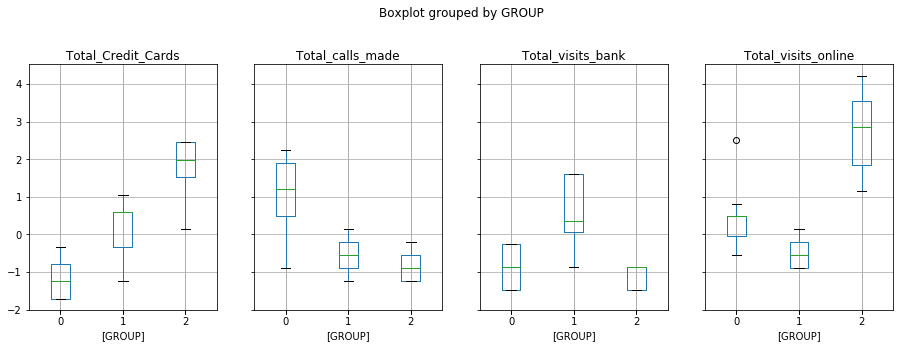

In [19]:
Cust_Data_Scaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

#### Observation:
1. Group=0 has more cases than Group=1 for 'Ave Credit Limit', 'Total Credit Cards' and 'Total Visists Online'
2. Total visits to the bank & Total calls made for Group=1 are very low,where as Total visits Online for Group=1 is very high
3. Group=2 made a lot of calls, presumably to inquire about the product
4. Cluster for Group=0's data is very different from Groups 1 & 2 for 'Ave Credit Limit', 'Total Credit Cards' and 'Total Visists Online'

#### Looking at 5 clusters at the next elbow point, with K = 5.

In [20]:
# Using Cluster With K = 5
final_model=KMeans(5)
final_model.fit(Cust_Data_Scaled)
prediction=final_model.predict(Cust_Data_Scaled)

#Append the prediction 
Cust_Data_New["GROUP"] = prediction
Cust_Data_Scaled["GROUP"] = prediction
print("Groups Assigned : \n")
Cust_Data_New.head()

Groups Assigned : 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,100000,2,1,1,0,3
1,50000,3,0,10,9,0
2,50000,7,1,3,4,3
3,30000,5,1,1,4,3
4,100000,6,0,12,3,2


#### Four groups are formed : 0, 1 , 2 & 3

In [21]:
# Assign Group

Cust_Data_Cluster = Cust_Data_New.groupby(['GROUP'])
Cust_Data_Cluster.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,12300.813008,2.357724,0.878049,3.626016,8.398374
1,31226.315789,5.478947,4.515789,1.010526,1.936842
2,141040.000000,8.740000,0.600000,10.900000,1.080000
3,36111.675127,5.543147,2.492386,0.959391,2.071066
4,12070.000000,2.460000,0.990000,3.480000,5.020000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023694E746D8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000023694BCEA58>]], dtype=object)

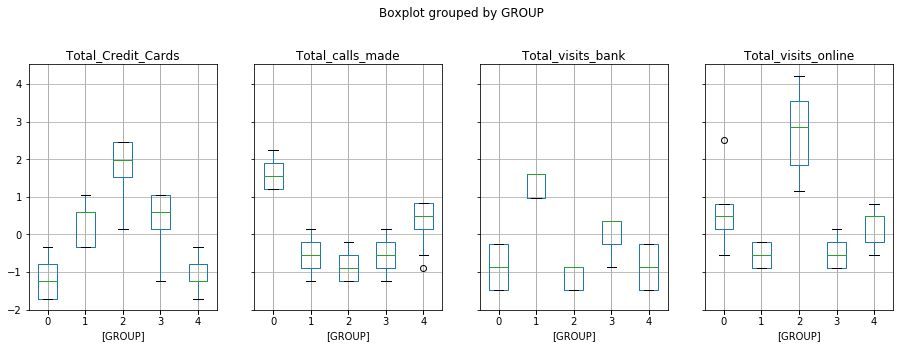

In [22]:
Cust_Data_Scaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

#### Observation:

1. Clustering is similar for k-5 to when k=3 with the fourth group 'Group=3' showing high values for 'Ave Credit Limit', 'Total Credit Cards' and 'Total Visists Online'.

2. There seems to be some relation between the Credit Limit, the no. of Credit Cards and Total Visits Online.

### 4.	Execute hierarchical clustering (with different linkages) with the help of dendrogram and cophenetic coeff. Analyse clusters formed using boxplot (15 marks).

In [23]:
from sklearn.cluster import AgglomerativeClustering 

#### (a) Linkage = Average

In [24]:
# Linkage = average
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')

In [25]:
model.fit(Cust_Data_Scaled)


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=3, pooling_func='deprecated')

In [26]:
Cust_Data_Types['labels'] = model.labels_
Cust_Data_Types.head(10)

#Cust_Data_Types.groupby(["labels"]).count()

C:\Users\AsusR540u\.conda\envs\Mawingu_2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,2,1,1,0,0
1,3,0,10,9,2
2,7,1,3,4,0
3,5,1,1,4,0
4,6,0,12,3,1
5,3,0,1,8,2
6,5,0,11,2,1
7,3,0,1,1,0
8,2,0,2,2,0
9,4,0,1,7,2


In [27]:
Cust_Data_Cluster = Cust_Data_Types.groupby(['labels'])

In [28]:
Cust_Data_Cluster.mean()

,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,
0,4.885010,2.973306,1.496920,2.624230
1,8.740000,0.600000,10.900000,1.080000
2,2.357724,0.878049,3.626016,8.398374


In [29]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [30]:
from scipy.spatial.distance import pdist  # Analyze distribution between data points (pairwaise)

In [31]:
# Use cophenetic coefficient to measure the correlation between the distance of points in feature space and Euclidean distance on dendrogram

Z = linkage(Cust_Data_Scaled, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(Cust_Data_Scaled))

c

0.88529596072804506

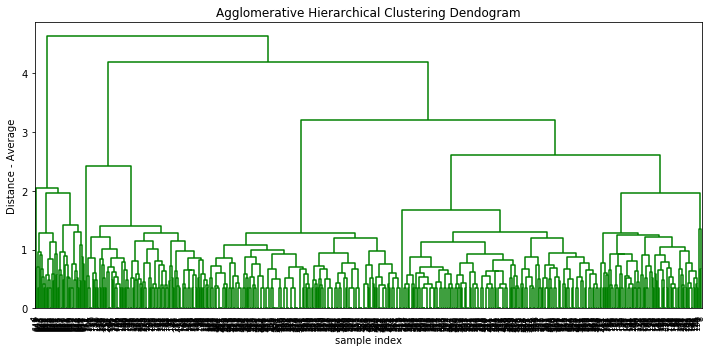

In [32]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance - Average')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

####  (b) Linkage = Ward

In [33]:
# Linkage = average
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='ward')

In [34]:
model.fit(Cust_Data_Scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=3,
            pooling_func='deprecated')

In [35]:
Cust_Data_Types['labels'] = model.labels_
Cust_Data_Types.head(10)

C:\Users\AsusR540u\.conda\envs\Mawingu_2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,2,1,1,0,0
1,3,0,10,9,1
2,7,1,3,4,0
3,5,1,1,4,0
4,6,0,12,3,0
5,3,0,1,8,1
6,5,0,11,2,0
7,3,0,1,1,0
8,2,0,2,2,0
9,4,0,1,7,1


In [36]:
Cust_Data_Cluster = Cust_Data_Types.groupby(['labels'])

In [37]:
Cust_Data_Cluster.mean()

,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,
0,5.115274,1.786744,3.118156,2.778098
1,2.357724,0.878049,3.626016,8.398374
2,5.478947,4.515789,1.010526,1.936842


In [38]:
# Use cophenetic coefficient to measure the correlation between the distance of points in feature space and Euclidean distance on dendrogram

Z = linkage(Cust_Data_Scaled, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(Cust_Data_Scaled))

c

0.82219661497811469

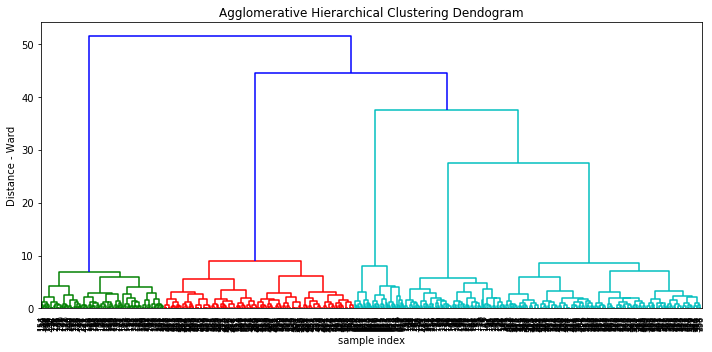

In [39]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance - Ward')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

#### (c) Linkage = Single

In [40]:
# Linkage = single
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='single')

In [41]:
model.fit(Cust_Data_Scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='single', memory=None, n_clusters=3,
            pooling_func='deprecated')

In [42]:
Cust_Data_Types['labels'] = model.labels_
Cust_Data_Types.head(10)

C:\Users\AsusR540u\.conda\envs\Mawingu_2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,2,1,1,0,0
1,3,0,10,9,1
2,7,1,3,4,0
3,5,1,1,4,0
4,6,0,12,3,0
5,3,0,1,8,1
6,5,0,11,2,0
7,3,0,1,1,0
8,2,0,2,2,0
9,4,0,1,7,1


In [43]:
Cust_Data_Cluster = Cust_Data_Types.groupby(['labels'])

In [44]:
Cust_Data_Cluster.mean()

,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,
0,5.115274,1.786744,3.118156,2.778098
1,2.357724,0.878049,3.626016,8.398374
2,5.478947,4.515789,1.010526,1.936842


In [45]:
Z = linkage(Cust_Data_Scaled, metric='euclidean', method='single')
c, coph_dists = cophenet(Z , pdist(Cust_Data_Scaled))

c

0.79686201621118613

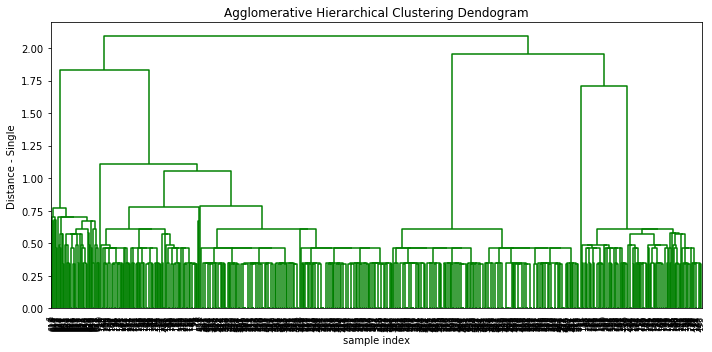

In [46]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance - Single')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

#### (d) Linkage = Complete

In [47]:
# Linkage = average
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='complete')

In [48]:
model.fit(Cust_Data_Scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='complete', memory=None,
            n_clusters=3, pooling_func='deprecated')

In [49]:
Cust_Data_Types['labels'] = model.labels_
Cust_Data_Types.head(10)

C:\Users\AsusR540u\.conda\envs\Mawingu_2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,2,1,1,0,0
1,3,0,10,9,0
2,7,1,3,4,2
3,5,1,1,4,2
4,6,0,12,3,1
5,3,0,1,8,0
6,5,0,11,2,1
7,3,0,1,1,0
8,2,0,2,2,0
9,4,0,1,7,0


In [50]:
Cust_Data_Cluster = Cust_Data_Types.groupby(['labels'])

In [51]:
Cust_Data_Cluster.mean()

,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,
0,2.401786,0.928571,3.549107,6.852679
1,8.740000,0.600000,10.900000,1.080000
2,5.520725,3.492228,0.984456,2.010363


In [52]:

Z = linkage(Cust_Data_Scaled, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(Cust_Data_Scaled))

c

0.87293759841604901

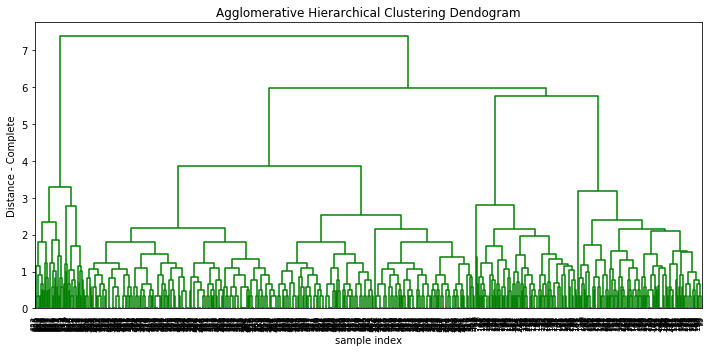

In [53]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance - Complete')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

### Observation:

The Hierachical Clustering using the Linkage 'Average' - 0.88 scores better than the others, in this order 'Complete'- 0.87, 'Single' - 0.82 and 'Ward' - 0.85

### 5.	Calculate average silhouette score for both methods. (5 marks).

#### Using yellowbrick method to select K

In [54]:
# from yellowbrick.cluster import KElbowVisualizer
# model = KMeans()
# Visualizer = KELbowVisualizer(model, k=(4,12))

# visualizer.fit(Cust_Data_Scaled)     # fit the data to the visua;lizer
# visualizer.show()                    # finalize and render the figure

#### a. Analysing K-Means Cluster using the Silhouetic Coefficient

In [55]:
#Set the value of k=6
kmeans = KMeans(n_clusters=6, n_init = 15, random_state=2345)

In [56]:
kmeans.fit(Cust_Data_New)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=15, n_jobs=None, precompute_distances='auto',
    random_state=2345, tol=0.0001, verbose=0)

In [57]:
centroids = kmeans.cluster_centers_

In [58]:
centroids

array([[  1.80352941e+04,   3.91764706e+00,   2.21176471e+00,
          2.27647059e+00,   4.31764706e+00,   1.98823529e+00],
       [  6.54946237e+04,   5.65591398e+00,   3.19354839e+00,
          1.13978495e+00,   2.00000000e+00,   2.20430108e+00],
       [  1.09863636e+05,   8.45454545e+00,   6.36363636e-01,
          1.02272727e+01,   1.18181818e+00,   2.04545455e+00],
       [  4.08928571e+04,   5.55357143e+00,   3.45535714e+00,
          1.15178571e+00,   2.09821429e+00,   1.99107143e+00],
       [  8.88983051e+03,   3.69491525e+00,   2.10593220e+00,
          2.45762712e+00,   4.90677966e+00,   1.76271186e+00],
       [  1.69148148e+05,   8.66666667e+00,   5.55555556e-01,
          1.08518519e+01,   9.62962963e-01,   2.00000000e+00]])

#### There are 6 centroids for 6 clusters

In [59]:
#Clculate the centroids for the columns to profile
centroid_df = pd.DataFrame(centroids, columns = list(Cust_Data_New) )

In [60]:
print(centroid_df)

   Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0      18035.294118            3.917647           2.211765   
1      65494.623656            5.655914           3.193548   
2     109863.636364            8.454545           0.636364   
3      40892.857143            5.553571           3.455357   
4       8889.830508            3.694915           2.105932   
5     169148.148148            8.666667           0.555556   

   Total_visits_online  Total_calls_made     GROUP  
0             2.276471          4.317647  1.988235  
1             1.139785          2.000000  2.204301  
2            10.227273          1.181818  2.045455  
3             1.151786          2.098214  1.991071  
4             2.457627          4.906780  1.762712  
5            10.851852          0.962963  2.000000  


In [61]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [62]:
# Joining the label dataframe with the data frame.
df_labeled = Cust_Data_New.join(df_labels)

In [63]:
df_analysis = (df_labeled.groupby(['labels'] , axis=0)).head(4177)  # the groupby creates a groupeddataframe that needs 
# to be converted back to dataframe. 
df_analysis

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP,labels
0,100000,2,1,1,0,3,2
1,50000,3,0,10,9,0,3
2,50000,7,1,3,4,3,3
3,30000,5,1,1,4,3,3
4,100000,6,0,12,3,2,2
5,20000,3,0,1,8,0,0
6,100000,5,0,11,2,2,2
7,15000,3,0,1,1,4,0
8,5000,2,0,2,2,4,4
9,3000,4,0,1,7,0,4


In [64]:
df_labeled['labels'].value_counts()

4    236
0    170
3    112
1     93
5     27
2     22
Name: labels, dtype: int64

In [65]:
# To Visualize with 3-dimension plot  using mplot3d, with K = 3
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, '3D plot of KMeans Clustering')

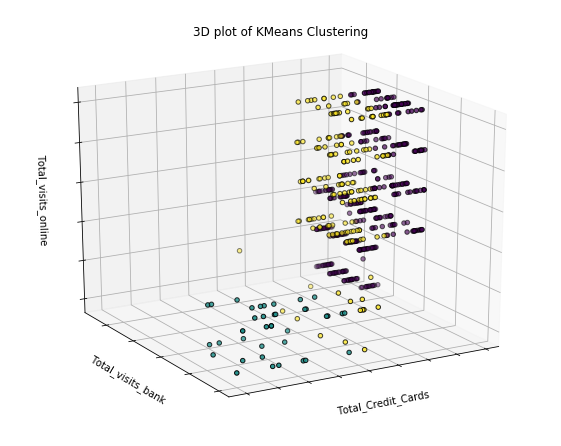

In [66]:

## 3D plots of clusters

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
k3_model=KMeans(3)
k3_model.fit(Cust_Data_New)
labels = k3_model.labels_
ax.scatter(Cust_Data_New.iloc[:, 0], Cust_Data_New.iloc[:, 1], Cust_Data_New.iloc[:, 2],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Total_Credit_Cards')
ax.set_ylabel('Total_visits_bank')
ax.set_zlabel('Total_visits_online')
ax.set_title('3D plot of KMeans Clustering')

#### b. Analysing Hierachical Cluster using the Silhouetic Coefficient

In [67]:
# check how good the cluster is, by the using silhoutte_score 

from sklearn.metrics import silhouette_samples, silhouette_score
n_clusters=3
silhoutte_avg = silhouette_score(Cust_Data_New, prediction)
print("For n_clusters =", n_clusters,
     "The average silhoutte_score is :", silhoutte_avg)

For n_clusters = 3 The average silhoutte_score is : -0.159540170255


#### Observation: Score is very low

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023696756C88>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002369694C668>]], dtype=object)

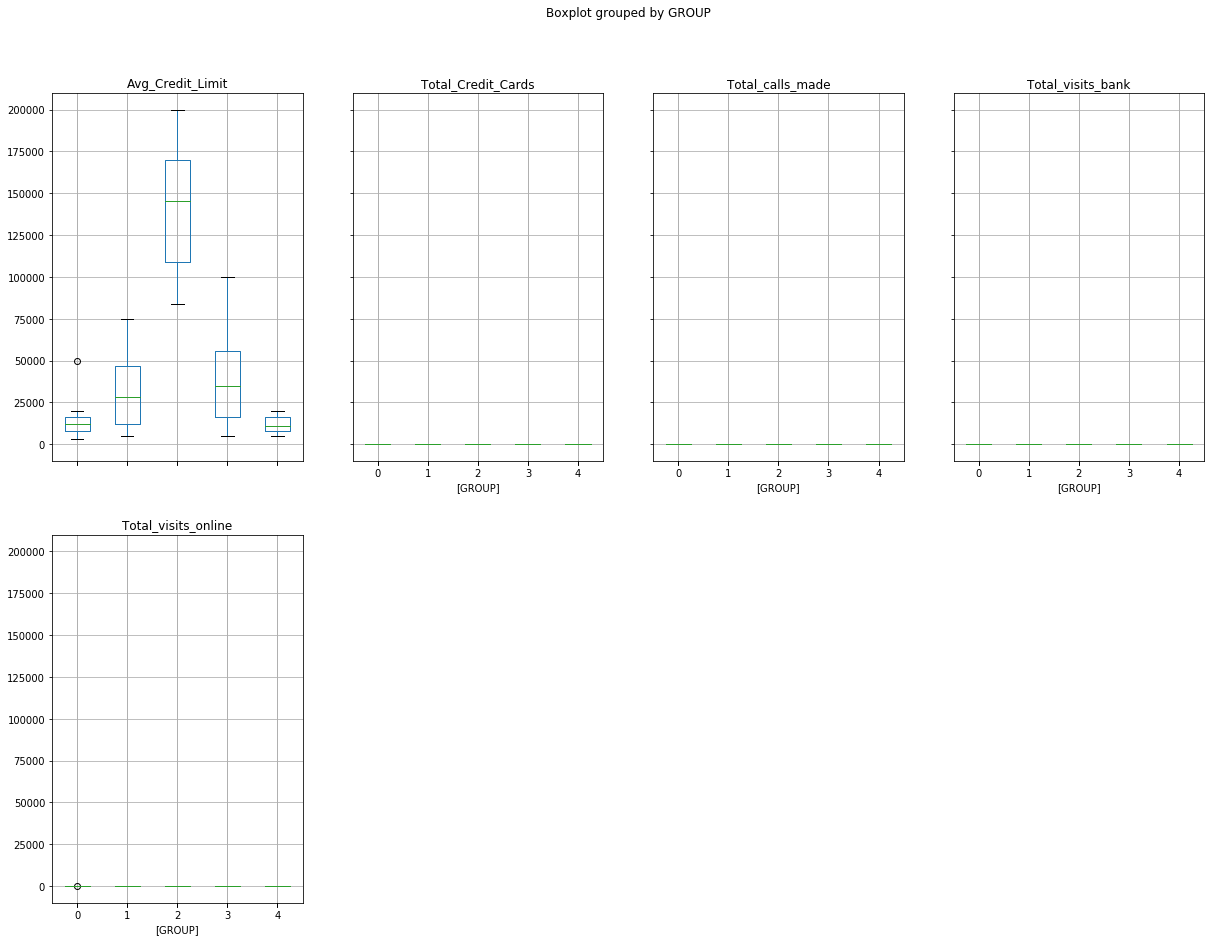

In [68]:
Cust_Data_New.boxplot(by = 'GROUP',  layout=(2,4), figsize=(20, 15))

In [69]:
# To determine if a relationship exists between the variables - 'Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online' and 'Total_calls_made'

Cust_Data_New['Avg_Credit_Limit'].corr(Cust_Data_New['Total_Credit_Cards'])

0.60886049355249638

NB: Positive Correlation between Credit Limit and Total No. of Credit Cards

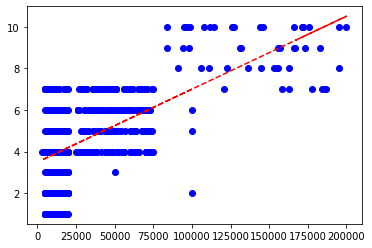

In [70]:
%matplotlib inline
import pandas as pd
plt.plot(Cust_Data_New['Avg_Credit_Limit'], Cust_Data_New['Total_Credit_Cards'], 'bo')
z = np.polyfit(Cust_Data_New['Avg_Credit_Limit'], Cust_Data_New['Total_Credit_Cards'],1)
p = np.poly1d(z)
plt.plot(Cust_Data_New['Avg_Credit_Limit'], p(Cust_Data_New['Avg_Credit_Limit']), "r--")

#geom_point()

Observation: The plot shows a positive correlation coefficient indicating a relationship between 'Ave Credit Limt' with 'Total Credit Cards' which means the higher the credit limit, the likelyhood that the customer has more cards.  

In [71]:
Cust_Data_New['Avg_Credit_Limit'].corr(Cust_Data_New['Total_visits_bank'])

-0.10031230969326996

NB: Negative Correlation between the Credit Limit and Total No. of visits to the bank. \\\\\\\\\\\\

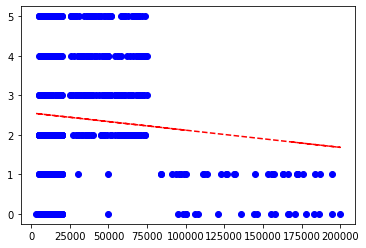

In [72]:
%matplotlib inline
import pandas as pd
plt.plot(Cust_Data_New['Avg_Credit_Limit'], Cust_Data_New['Total_visits_bank'], 'bo')
z = np.polyfit(Cust_Data_New['Avg_Credit_Limit'], Cust_Data_New['Total_visits_bank'],1)
p = np.poly1d(z)
plt.plot(Cust_Data_New['Avg_Credit_Limit'], p(Cust_Data_New['Avg_Credit_Limit']), "r--")

#geom_point()

NB: There is a Negative Correlation between the Credit Limit and Total No. of visits to the bank, meaning if the Customer's Credit limit is high, then they most likely don't need to visit the bank very regularly for review and/or assistance. 

#### Observations: Summary
1. As there are outliers in the data
2. Checking if the various attributes are independent and/or influence each other
    

### 6.	Compare K-means clusters with Hierarchical clusters. (5 marks).

K-Means Clusters give better results than the Hierachichal Cluster means especially where there are more clusters or groups of customers

(i) K-Means Clustering - Highest value obtained for k-means is 0.88

(ii) Hierarchical Clustering -Highest values obtained is 0.61

### 7.	Analysis the clusters formed, tell us how is one cluster different from another and answer all the key questions. (10 marks).

#### Key Questions

#### How many different segmentsof customers are there?

a.) For the K-Means, the more centroids there were, the better the result in clustering. It did not seem to matter what value we chose for K in the k-means cluster. Whther we had k=3 pr k=5, there wree three distinct groups based on
(i)   Total_Credit_Cards
(ii)  Total_visits_bank
(iii) Total_visits_online

b.) For the Hierachical Clusters, the Hierachical Clustering using the Linkage 'Average' - 0.88 scores better than the others, in this order 'Complete'- 0.87, 'Single' - 0.82 and 'Ward' - 0.85

#### How are these segments different from each other 
There are 6 segments as follows, given by the silhoute method
4    236
0    170
3    112
1     93
5     27
2     22


#### What are the recomemndations to the bank on how to better market services to these customers?

i) The bank ought to increase the number of calls to customers and offer these services
ii) Focus should be given to selling credit cards, and better interset be given to customers with good balances, starting with low Credit limits and fewer Credit cards.
iii) The bank should maintain engagements with the customers, as this ensures the customers taking these products keep within the required limits and stay longer with the bank